<div style = "Text-aling: center">


# Analisis de datos masivos 
 ## Delitos San Francisco 

# Jose Gabriel Rodriguez Rivas
# Antonio Emmanuel Martinez Rodriguez
</div>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium 

In [16]:
dataset_path = './Map-Crime_Incidents-Previous_Three_Months.csv'

In [17]:
SF = pd.read_CSV(dataset_path)
SF.head()

AttributeError: module 'pandas' has no attribute 'read_CSV'

In [13]:
SF.columns

NameError: name 'SF' is not defined

In [18]:
SF = pd.read_csv('Map-Crime_Incidents-Previous_Three_Months.csv')

In [20]:
SF = pd.read_csv(dataset_path)
SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)"
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)"
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)"
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)"
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)"


In [21]:
SF ['Month']=SF['Date'].apply ( lambda  row : int (row[0:2]))
SF ['Day']=SF['Date'].apply ( lambda  row : int (row[3:5]))

In [22]:
SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,NaN,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,NaN,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,NaN,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,NaN,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


In [23]:
del SF ['IncidntNum']
SF.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,"(37.7909741243888, -122.417392830334)",8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,"(37.7963018736036, -122.404417620748)",8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,"(37.7894347630337, -122.406958660602)",8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214965, -122.419671780296)",8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,"(37.7851670875814, -122.417903977564)",8,31


In [24]:
SF.drop('Location',axis=1,inplace= True )
SF.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


In [27]:
contarCategorias= SF['Category'].value_counts()
contarCategorias.tail(10)

SUICIDE                       14
FAMILY OFFENSES                9
EXTORTION                      7
STOLEN PROPERTY                7
SEX OFFENSES, NON FORCIBLE     5
LOITERING                      5
BAD CHECKS                     3
PORNOGRAPHY/OBSCENE MAT        1
BRIBERY                        1
GAMBLING                       1
Name: Category, dtype: int64

In [30]:
contarCategorias= SF['PdDistrict'].value_counts().head(1)
contarCategorias.head()

SOUTHERN    6185
Name: PdDistrict, dtype: int64

## crear subconjuntos de datos y organizacion en marcos mas pequeños 

In [31]:
crimenesAgosto = SF [SF['Month']==8 ]
crimenesAgosto.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


## cuantos incidentes de delitos hubo en agsto 

In [32]:
len(crimenesAgosto
   )

9720

cuantos crimenes se informaron en agosto ?

In [41]:
robosAgosto = SF [(SF['Category']=='LARCENY/THEFT'|(SF['Category']=='LARCENY/THEFT')& ]
robosAgosto.head()

SyntaxError: invalid syntax (<ipython-input-41-b26575729453>, line 1)

In [35]:
crimenes0105= SF.query('Month == 8 and Day == 31')
crimenes0105.head()

,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Month,Day
0,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,20:30,CENTRAL,NONE,HYDE ST / CALIFORNIA ST,-122.417393,37.790974,8,31
1,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,14:30,CENTRAL,NONE,COLUMBUS AV / JACKSON ST,-122.404418,37.796302,8,31
2,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/31/2014 07:00:00 AM +0000,11:30,CENTRAL,NONE,SUTTER ST / STOCKTON ST,-122.406959,37.789435,8,31
3,DRUG/NARCOTIC,POSSESSION OF METH-AMPHETAMINE,Sunday,08/31/2014 07:00:00 AM +0000,17:49,MISSION,"ARREST, BOOKED",16TH ST / MISSION ST,-122.419672,37.765050,8,31
4,DRUG/NARCOTIC,POSSESSION OF COCAINE,Sunday,08/31/2014 07:00:00 AM +0000,18:05,NORTHERN,"ARREST, BOOKED",LARKIN ST / OFARRELL ST,-122.417904,37.785167,8,31


## Graficar Datos

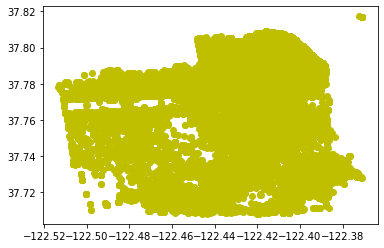

In [39]:
plt.plot (SF['X'],SF['Y'],'yo')
plt.show()

In [43]:
distritos = np.unique(SF['PdDistrict'])
colores_distritos = dict (zip (distritos,range(len(distritos))))
colores_distritos

{'BAYVIEW': 0,
 'CENTRAL': 1,
 'INGLESIDE': 2,
 'MISSION': 3,
 'NORTHERN': 4,
 'PARK': 5,
 'RICHMOND': 6,
 'SOUTHERN': 7,
 'TARAVAL': 8,
 'TENDERLOIN': 9}

In [44]:
SF['PdDistrictCode']= SF ['PdDistrict'].apply(lambda row : colores_distritos[row])

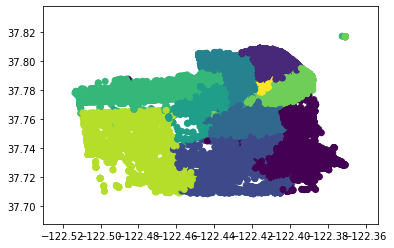

In [46]:
plt.scatter(SF['X'],SF['Y'],c=SF['PdDistrictCode'])

## TRAZAR GRAFICO EN MAPA 

In [54]:
from matplotlib import colors
districts = np.unique(SF['PdDistrict'])
print(list(colors.cnames.values())[0:len(districts)])

['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF']


In [55]:
color_dict = dict(zip(districts, list(colors.cnames.values())[0:-1:len(districts)]))  
color_dict

{'BAYVIEW': '#F0F8FF',
 'CENTRAL': '#8A2BE2',
 'INGLESIDE': '#00FFFF',
 'MISSION': '#FF8C00',
 'NORTHERN': '#FF1493',
 'PARK': '#F8F8FF',
 'RICHMOND': '#4B0082',
 'SOUTHERN': '#FAFAD2',
 'TARAVAL': '#B0C4DE',
 'TENDERLOIN': '#9370DB'}

In [56]:
#Create map
map_osm = folium.Map(location=[SF['Y'].mean(), SF['X'].mean()], zoom_start = 12)
plotEvery = 50
obs =list( zip( SF['Y'], SF['X'], SF['PdDistrict']))

for el in obs[0:-1:plotEvery]:
    
    folium.CircleMarker(el[0:2], color=color_dict[el[2]], fill_color=el[2],radius=10).add_to(map_osm)

In [57]:
map_osm